In [84]:
# PYTHON - PROJECT 1 -  ANZHELA CHANYSHEVA

# I import the core Python libraries used for data analysis and also set some display options.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

sns.set(style='whitegrid')

In [85]:
# I load the dataset into a Pandas DataFrame using pd.read_csv. I use db.head() to display the first rows of the dataset and understand
# what columns exist,what type of information the dataset contains, and whether the data loaded correctly.

df=pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv")
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [86]:
# I inspect the basic structure of the dataset. I use db.info() to check the structure of the dataset, to understand how many
# rows and columns, data types, and missing values. According to the statistical analysis, the standart deviation (std) is high
# (around 93) because schools vary significantly in size and the number of students taking the test.

print('Shape (rows, columns):', df.shape)

print('\nColumn names:')
print(df.columns)

print('\nData types and non-null counts:')
df.info()

print('\nSummary statistics (numeric columns):')
df.describe()

Shape (rows, columns): (212331, 15)

Column names:
Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Test

,Year,Total Tested
count,"212,331.00","212,331.00"
mean,"2,015.96",49.36
std,0.80,93.02
min,"2,015.00",1.00
25%,"2,015.00",5.00
50%,"2,016.00",20.00
75%,"2,017.00",57.00
max,"2,017.00","1,729.00"


In [87]:
#I check unique values of Total Tested to analyze why std=93.02 for "Total Tested" has such a high value .

df['Total Tested'].unique()
#df['Total Tested'].unique()[:20]

array([  4,  16,   9, ..., 935, 679, 951])

In [88]:
# I want to see and choose the name of the school that I liked the most (a kind of random choice), so that
# I can then analyze and compare it with all the other schools.

unique_schools = df["School Name"].unique()
len(unique_schools),
unique_schools[:20]

array(['P.S. 034 Franklin D. Roosevelt', 'P.S. 140 Nathan Straus',
       'P.S. 184m Shuang Wen', 'P.S. 188 The Island School',
       'Orchard Collegiate Academy',
       'Technology, Arts, and Sciences Studio',
       'University Neighborhood Middle School',
       'Collaborative Academy of Science, Technology, & La',
       'School for Global Leaders', 'University Neighborhood High School',
       'East Side Community School', 'Forsyth Satellite Academy',
       'Marta Valle High School',
       'Lower East Side Preparatory High School',
       'New Explorations into Science, Technology and Math',
       'Cascades High School', 'Bard High School Early College',
       'Tompkins Square Middle School',
       '47 The American Sign Language and English Secondar',
       'J.H.S. 104 Simon Baruch'], dtype=object)

In [89]:
# I use len() to check the number of unique schools in the dataset.

unique_schools = df["School Name"].unique()
len(unique_schools)

1012

In [106]:
#I want to see all columns and all cell values, including NaN,in order to identify missing data and perform data cleaning later.

df.describe(include='all')

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
count,212331,212331,212331,212321,"212,331.00","212,331.00","137,109.00",212331,212331,212331,212331,212331,212331,212331,212331
unique,1018,1012,6,14,NaN,NaN,NaN,446,992,945,992,744,1000,707,999
top,26Q430,New Visions Charter High School for Advanced Math,High school,Common Core Algebra,NaN,NaN,NaN,s,s,s,s,s,s,na,na
freq,490,1337,151160,29254,NaN,NaN,NaN,75222,75222,75222,75222,75222,75222,142680,142680
mean,NaN,NaN,NaN,NaN,"2,015.96",49.36,66.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.80,93.02,11.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,"2,015.00",1.00,15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,"2,015.00",5.00,58.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,"2,016.00",20.00,65.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,"2,017.00",57.00,73.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
# I check missing values and unique values

print('Missing values per column:')
print(df.isna().sum())

print('\nPercentage of missing values per column:')
print((df.isna().mean() * 100).round(2))

print('\nNumber of unique values per column:')
print(df.nunique())

Missing values per column:
school_dbn                         0
school_name                        0
school_level                       0
regents_exam                      10
year                               0
total_tested                       0
mean_score                     75222
number_scoring_below_65            0
percent_scoring_below_65           0
number_scoring_65_or_above         0
percent_scoring_65_or_above        0
number_scoring_80_or_above         0
percent_scoring_80_or_above        0
number_scoring_cr                  0
percent_scoring_cr                 0
dtype: int64

Percentage of missing values per column:
school_dbn                     0.00
school_name                    0.00
school_level                   0.00
regents_exam                   0.00
year                           0.00
total_tested                   0.00
mean_score                    35.43
number_scoring_below_65        0.00
percent_scoring_below_65       0.00
number_scoring_65_or_above     0.00
per

In [109]:
#Normally, df.isnull() and df.isna() are identical, both detect NaN values. Previosly, I used df.isna(), where "mean_score" = 0,
#I use df.isnull() shows "mean_score"=75222. I convert the column to numeric, both df.isnull() and df.isna() return identical results
#of "mean_score".

print('Missing values per column:')
print(df.isnull().sum())

print('Missing values per column:')
print(df.isna().sum())

#df['mean_score']=pd.to_numeric(df['mean_score'],errors='coerce')

Missing values per column:
School DBN                         0
School Name                        0
School Level                       0
Regents Exam                      10
Year                               0
Total Tested                       0
Mean Score                     75222
Number Scoring Below 65            0
Percent Scoring Below 65           0
Number Scoring 65 or Above         0
Percent Scoring 65 or Above        0
Number Scoring 80 or Above         0
Percent Scoring 80 or Above        0
Number Scoring CR                  0
Percent Scoring CR                 0
dtype: int64
Missing values per column:
School DBN                         0
School Name                        0
School Level                       0
Regents Exam                      10
Year                               0
Total Tested                       0
Mean Score                     75222
Number Scoring Below 65            0
Percent Scoring Below 65           0
Number Scoring 65 or Above         0
Percent 

In [111]:
# I chose Landmark High School and compare this school to schools in the entire dataset.

df["Mean Score"] =pd.to_numeric(df["Mean Score"],
errors="coerce")
df_clean=df.dropna(subset=["Mean Score"])

In [112]:
# Check missing values again

df.isna().sum()

,0
School DBN,0
School Name,0
School Level,0
Regents Exam,10
Year,0
Total Tested,0
Mean Score,75222
Number Scoring Below 65,0
Percent Scoring Below 65,0
Number Scoring 65 or Above,0


In [118]:
# 1. Clean column names
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('-', '_')
)
df.columns

Index(['school_dbn', 'school_name', 'school_level', 'regents_exam', 'year',
       'total_tested', 'mean_score', 'number_scoring_below_65',
       'percent_scoring_below_65', 'number_scoring_65_or_above',
       'percent_scoring_65_or_above', 'number_scoring_80_or_above',
       'percent_scoring_80_or_above', 'number_scoring_cr',
       'percent_scoring_cr'],
      dtype='object')

In [119]:
# Select the school

school_name = "Landmark High School"
school_data = df_clean[df_clean["School Name"] ==school_name]

In [120]:
# Descriptive statistics for all schools
overall_mean=df_clean["Mean Score"].mean()

In [121]:
overall_median=df_clean["Mean Score"].median()

In [122]:
overall_min=df_clean["Mean Score"].min()

In [123]:
overall_max=df_clean["Mean Score"].max()

In [124]:
school_mean=school_data["Mean Score"].mean()
print("==== Descriptive Statistics ====")
print(f"Overall Mean Score across all schools: {overall_mean:.2f}")
print(f"Overall Median Score: {overall_median:.2f}")
print(f"Minimum Score: {overall_min:.2f}, Maximum Score: {overall_max:.2f}")
print(f"\nMean Score for {school_name}: {school_mean:.2f}")

==== Descriptive Statistics ====
Overall Mean Score across all schools: 66.00
Overall Median Score: 65.40
Minimum Score: 15.00, Maximum Score: 98.70

Mean Score for Landmark High School: 71.64


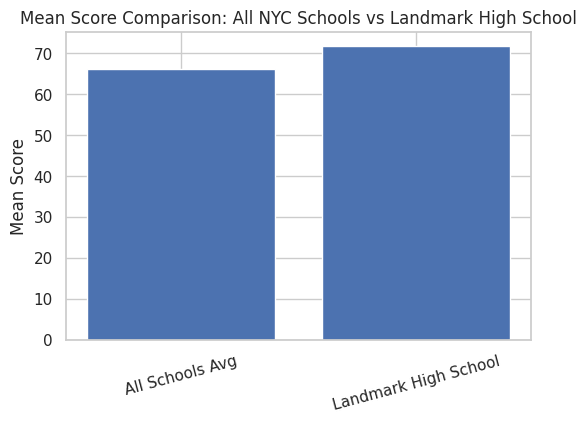

In [125]:
# Visualization
plt.figure(figsize=(6,4))
plt.bar(["All Schools Avg", school_name], [overall_mean, school_mean])
plt.title("Mean Score Comparison: All NYC Schools vs Landmark High School")
plt.ylabel("Mean Score")
plt.xticks(rotation=15)
plt.show()

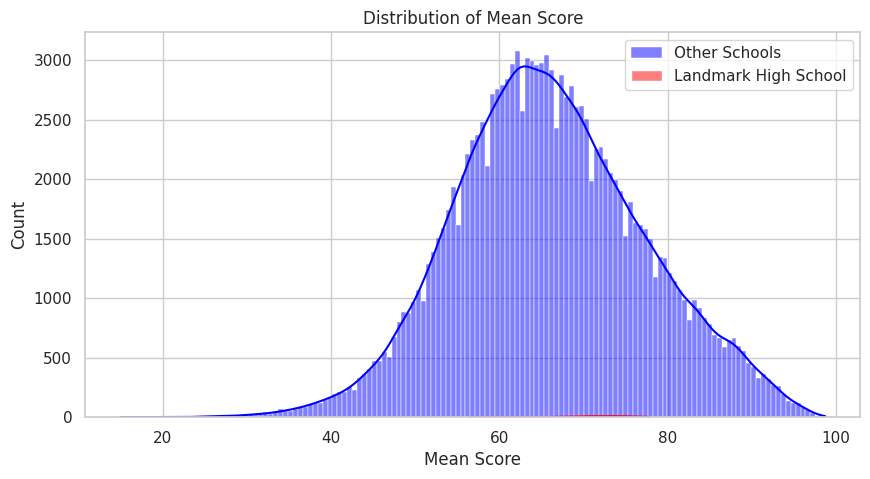

/tmp/ipython-input-3944575793.py:25: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[others['mean_score'], landmark['mean_score']],


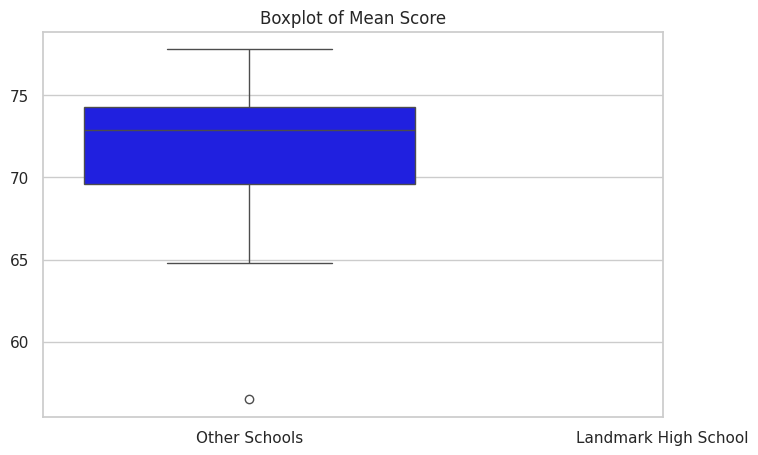

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter selected school

school_name = "Landmark High School"
landmark = df[df['school_name'] == school_name]
others = df[df['school_name'] != school_name]

# 1. Histogram (histplot) ,mean_score

plt.figure(figsize=(10,5))
sns.histplot(others['mean_score'], color='blue', label='Other Schools', kde=True)
sns.histplot(landmark['mean_score'], color='red', label=school_name, kde=True)
plt.title('Distribution of Mean Score')
plt.xlabel('Mean Score')
plt.ylabel('Count')
plt.legend()
plt.show()

# 2. Boxplot, mean_score

plt.figure(figsize=(8,5))
sns.boxplot(data=[others['mean_score'], landmark['mean_score']],
            palette=['blue','red'])
plt.xticks([0,1], ['Other Schools', school_name])
plt.title('Boxplot of Mean Score')
plt.show()

In [ ]:
#The analysis shows that Landmark High School has higher mean scores compare to other schools in the dataset.
#This trend is consistent across multiple years and different types of number scoring. I plan to analyze it.